## Importing the libraries

In [1]:
import pandas as pd 
import sklearn
import numpy as np
from decimal import Decimal
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(); sns.set_style('whitegrid')
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE



## Data exploration and cleaning

We will start by reading the data and filling the missing values and doing the changes that need to be done in order to be able to apply our models on a clean dataset

Our problem is a binary classification since we want to predict the TARGET_FLAG column

In [2]:
df_train = pd.read_csv("auto-insurance-fall-2017/train_auto.csv")
df_test = pd.read_csv("auto-insurance-fall-2017/test_auto.csv")

In [3]:
df_train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


In [4]:
df_train.shape

(8161, 26)

We will divide our dataset into categories of different festures as floats, integers, objects, money, binary, ordinal and finally columns with different modes.

## INTEGERS

Here, we will represent our integer features and we can see the presence of continous and ordinal distributions.

In [5]:
int_dtypes_idx1 = np.where((df_train.dtypes == np.int64))[0] 
df_train.iloc[:, int_dtypes_idx1].head()

,INDEX,TARGET_FLAG,KIDSDRIV,HOMEKIDS,TRAVTIME,TIF,CLM_FREQ,MVR_PTS
0,1,0,0,0,14,11,2,3
1,2,0,0,0,22,1,0,0
2,4,0,0,1,5,4,2,3
3,5,0,0,0,32,7,0,0
4,6,0,0,0,36,1,2,3


In [6]:
int_dtypes_idx2 = np.where((df_test.dtypes == np.int64))[0] 
df_test.iloc[:, int_dtypes_idx2].head()

,INDEX,KIDSDRIV,HOMEKIDS,TRAVTIME,TIF,CLM_FREQ,MVR_PTS
0,3,0,0,26,1,0,2
1,9,1,1,21,6,1,2
2,10,0,2,30,10,0,0
3,18,0,2,74,6,0,0
4,21,0,0,45,1,2,4


## Floats

Here, we will represent our float features as we can see that AGE, YOJ and CAR_AGE are the 3 floats present in our dataset.

In [7]:
float_dtypes_idx1 = np.where((df_train.dtypes == np.float64))[0] 
df_train.iloc[:, float_dtypes_idx1].head()

,TARGET_AMT,AGE,YOJ,CAR_AGE
0,0.0,60.0,11.0,18.0
1,0.0,43.0,11.0,1.0
2,0.0,35.0,10.0,10.0
3,0.0,51.0,14.0,6.0
4,0.0,50.0,NaN,17.0


In [8]:
float_dtypes_idx2 = np.where((df_test.dtypes == np.float64))[0] 
df_test.iloc[:, float_dtypes_idx2].head()

,TARGET_FLAG,TARGET_AMT,AGE,YOJ,CAR_AGE
0,NaN,NaN,48.0,11.0,10.0
1,NaN,NaN,40.0,11.0,1.0
2,NaN,NaN,44.0,12.0,10.0
3,NaN,NaN,35.0,NaN,4.0
4,NaN,NaN,59.0,12.0,1.0


## Objects

In [9]:
object_dtypes_idx1 = np.where((df_train.dtypes != np.float64) & (df_train.dtypes != np.int64))[0] 
df_train.iloc[:, object_dtypes_idx1].head()

,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,URBANICITY
0,"$67,349",No,$0,z_No,M,PhD,Professional,Private,"$14,230",Minivan,yes,"$4,461",No,Highly Urban/ Urban
1,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,Commercial,"$14,940",Minivan,yes,$0,No,Highly Urban/ Urban
2,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,Private,"$4,010",z_SUV,no,"$38,690",No,Highly Urban/ Urban
3,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,Private,"$15,440",Minivan,yes,$0,No,Highly Urban/ Urban
4,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,Private,"$18,000",z_SUV,no,"$19,217",Yes,Highly Urban/ Urban


In [10]:
object_dtypes_idx2 = np.where((df_test.dtypes != np.float64) & (df_test.dtypes != np.int64))[0] 
df_test.iloc[:, object_dtypes_idx2].head()

,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,CAR_USE,BLUEBOOK,CAR_TYPE,RED_CAR,OLDCLAIM,REVOKED,URBANICITY
0,"$52,881",No,$0,z_No,M,Bachelors,Manager,Private,"$21,970",Van,yes,$0,No,Highly Urban/ Urban
1,"$50,815",Yes,$0,z_No,M,z_High School,Manager,Private,"$18,930",Minivan,no,"$3,295",No,Highly Urban/ Urban
2,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,Commercial,"$5,900",z_SUV,no,$0,No,z_Highly Rural/ Rural
3,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,Private,"$9,230",Pickup,no,$0,Yes,z_Highly Rural/ Rural
4,"$87,460",No,$0,z_No,M,z_High School,Manager,Private,"$15,420",Minivan,yes,"$44,857",No,Highly Urban/ Urban


## Binary column

All the columns that contains yes/no we will swith them to 1/0 for a better representation.

In [11]:
BINARY_COLUMNS = ['PARENT1',
                  'MSTATUS',
                  'RED_CAR',
                  'REVOKED']

replace_binary_dict = {'No'  : 0,
                       'z_No': 0,
                       'no'  : 0,
                       'Yes' : 1,
                       'yes' : 1}

for column in BINARY_COLUMNS:
    df_train.loc[:, column] = df_train.loc[:, column].replace(replace_binary_dict)
    
df_train.loc[:, BINARY_COLUMNS].head()

,PARENT1,MSTATUS,RED_CAR,REVOKED
0,0,0,1,0
1,0,0,1,0
2,0,1,0,0
3,0,1,1,0
4,0,1,0,1


In [12]:
for column in BINARY_COLUMNS:
    df_test.loc[:, column] = df_test.loc[:, column].replace(replace_binary_dict)
    
df_test.loc[:, BINARY_COLUMNS].head()

,PARENT1,MSTATUS,RED_CAR,REVOKED
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,1
4,0,0,1,0


## Money(dollars)

Here, we need to convert money values into float values so we could use them easily.

In [13]:
object_dtypes_idx = np.where((df_train.dtypes != np.float) & (df_train.dtypes != np.int))[0] 
df_train.iloc[:, object_dtypes_idx].head()

DOLLARS_COLUMNS = ['INCOME',
                   'HOME_VAL',
                   'BLUEBOOK',
                   'OLDCLAIM'
                  ]

def replace_dollar_comma_sign(money):
    """
        Given a string representing an amount of money, return the corresponding float representation.
    """
    if type(money) is not str and math.isnan(money):
        return np.nan
    else:
        return float(Decimal(re.sub(r'[^\d.]', '', money)))
    
for column in DOLLARS_COLUMNS:
    df_train.loc[:, column] = df_train.loc[:, column].apply(replace_dollar_comma_sign)
    df_train.loc[:, column] = df_train.loc[:, column].apply(np.log)
    df_train.loc[:, column] = df_train.loc[:, column].replace({-np.inf: 1})
    
# Show processed columns
df_train.loc[:, DOLLARS_COLUMNS].head()

,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM
0,11.117643,1.000000,9.563108,8.403128
1,11.423537,12.457811,9.611797,1.000000
2,9.682779,11.729576,8.296547,10.563336
3,NaN,12.632160,9.644717,1.000000
4,11.652566,12.404616,9.798127,9.863551


In [14]:
for column in DOLLARS_COLUMNS:
    df_test.loc[:, column] = df_test.loc[:, column].apply(replace_dollar_comma_sign)
    df_test.loc[:, column] = df_test.loc[:, column].apply(np.log)
    df_test.loc[:, column] = df_test.loc[:, column].replace({-np.inf: 1})
    
# Show processed columns
df_test.loc[:, DOLLARS_COLUMNS].head()

,INCOME,HOME_VAL,BLUEBOOK,OLDCLAIM
0,10.875799,1.0,9.997433,1.000000
1,10.835947,1.0,9.848503,8.100161
2,10.680194,1.0,8.682708,1.000000
3,9.961945,1.0,9.130214,1.000000
4,11.378937,1.0,9.643421,10.711235


## Ordinal vars

 We will classify education as an ordinal variable that contains 4 categories and we will annotate them for 0 to 3 so our prediction will be simpler with numerical values.

In [15]:
LABEL = 'EDUCATION'

df_train.loc[:, LABEL].replace({'z_High School': '<High School'}, inplace=True)
df_train.loc[:, LABEL].replace({'<High School': 0,
                                'Bachelors'   : 1,
                                'Masters'     : 2,
                                'PhD'         : 3}, inplace=True)
df_train.loc[:, [LABEL]].head()

,EDUCATION
0,3
1,0
2,0
3,0
4,3


In [16]:
df_test.loc[:, LABEL].replace({'z_High School': '<High School'}, inplace=True)
df_test.loc[:, LABEL].replace({'<High School': 0,
                                'Bachelors'   : 1,
                                'Masters'     : 2,
                                'PhD'         : 3}, inplace=True)
df_test.loc[:, [LABEL]].head()

,EDUCATION
0,1
1,0
2,0
3,0
4,0


## Multiple Modes columns

Here, 'JOB' and 'CAR_TYPE' can have multiple modes, we will define a one hot encoding to map the columns into one hot vectors.

In [17]:
object_dtypes_idx1 = np.where((df_train.dtypes != np.float64) & (df_train.dtypes != np.int64))[0] 
df_train.iloc[:, object_dtypes_idx1].head()

,SEX,JOB,CAR_USE,CAR_TYPE,URBANICITY
0,M,Professional,Private,Minivan,Highly Urban/ Urban
1,M,z_Blue Collar,Commercial,Minivan,Highly Urban/ Urban
2,z_F,Clerical,Private,z_SUV,Highly Urban/ Urban
3,M,z_Blue Collar,Private,Minivan,Highly Urban/ Urban
4,z_F,Doctor,Private,z_SUV,Highly Urban/ Urban


In [18]:
object_dtypes_idx2 = np.where((df_test.dtypes != np.float64) & (df_test.dtypes != np.int64))[0] 
df_test.iloc[:, object_dtypes_idx2].head()

,SEX,JOB,CAR_USE,CAR_TYPE,URBANICITY
0,M,Manager,Private,Van,Highly Urban/ Urban
1,M,Manager,Private,Minivan,Highly Urban/ Urban
2,z_F,z_Blue Collar,Commercial,z_SUV,z_Highly Rural/ Rural
3,M,Clerical,Private,Pickup,z_Highly Rural/ Rural
4,M,Manager,Private,Minivan,Highly Urban/ Urban


In [19]:
# Inputting missing value for JOB

LABEL = 'JOB'
most_frequent_job1 = df_train.loc[:, LABEL].value_counts().index[0]
df_train.loc[:, LABEL].fillna(most_frequent_job1, inplace=True)

In [20]:
most_frequent_job2 = df_test.loc[:, LABEL].value_counts().index[0]
df_test.loc[:, LABEL].fillna(most_frequent_job2, inplace=True)

In [21]:
enc = OneHotEncoder(handle_unknown='ignore')
features = enc.fit_transform(df_train.iloc[:, object_dtypes_idx1]).toarray()

df_train.drop(columns=df_train.columns[object_dtypes_idx1], inplace=True)
new_columns = []
i = 0
for category in enc.categories_:
    # We keep only one column for binary categorical features
    if len(category) == 2:
        new_column = category[0]
        df_train[new_column] = features[:, i]
        new_columns.append(new_column)
        i += 2
    # O.W, we use one-hot-encoding
    else:
        for new_column in category:
            df_train[new_column] = features[:, i]
            new_columns.append(new_column)
            i += 1
            
df_train.loc[:, new_columns].head()

,M,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,z_Blue Collar,Commercial,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,Highly Urban/ Urban
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [22]:
enc = OneHotEncoder(handle_unknown='ignore')
features = enc.fit_transform(df_test.iloc[:, object_dtypes_idx2]).toarray()

df_test.drop(columns=df_test.columns[object_dtypes_idx2], inplace=True)
new_columns = []
i = 0
for category in enc.categories_:
    # We keep only one column for binary categorical features
    if len(category) == 2:
        new_column = category[0]
        df_test[new_column] = features[:, i]
        new_columns.append(new_column)
        i += 2
    # O.W, we use one-hot-encoding
    else:
        for new_column in category:
            df_test[new_column] = features[:, i]
            new_columns.append(new_column)
            i += 1
            
df_test.loc[:, new_columns].head()

,M,Clerical,Doctor,Home Maker,Lawyer,Manager,Professional,Student,z_Blue Collar,Commercial,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,Highly Urban/ Urban
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Drop columns

Here, we will drop some values with no informations regarding our prediction.

In [23]:
df_train.drop(columns=['INDEX','TARGET_AMT'], inplace=True)
df_test.drop(columns=['INDEX','TARGET_AMT'], inplace=True)

In [24]:
df_train.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,EDUCATION,...,Student,z_Blue Collar,Commercial,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,Highly Urban/ Urban
0,0,0,60.0,0,11.0,11.117643,0,1.000000,0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,43.0,0,11.0,11.423537,0,12.457811,0,0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,35.0,1,10.0,9.682779,0,11.729576,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0,0,51.0,0,14.0,NaN,0,12.632160,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,50.0,0,NaN,11.652566,0,12.404616,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [25]:
df_test.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,EDUCATION,...,Student,z_Blue Collar,Commercial,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,Highly Urban/ Urban
0,NaN,0,48.0,0,11.0,10.875799,0,1.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,NaN,1,40.0,1,11.0,10.835947,1,1.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,NaN,0,44.0,2,12.0,10.680194,1,1.0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,NaN,0,35.0,2,NaN,9.961945,1,1.0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,NaN,0,59.0,0,12.0,11.378937,0,1.0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
df_train.to_csv('preprocessed_train.csv')

In [38]:
df_test.to_csv('preprocessed_test.csv')

## Data Visualization

In [27]:
df_train = pd.read_csv("preprocessed_train.csv")
df_train = df_train.dropna()
df_train=df_train.drop('Unnamed: 0',axis=1)
df_train.head()

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,EDUCATION,...,Student,z_Blue Collar,Commercial,Minivan,Panel Truck,Pickup,Sports Car,Van,z_SUV,Highly Urban/ Urban
0,0,0,60.0,0,11.0,11.117643,0,1.000000,0,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,43.0,0,11.0,11.423537,0,12.457811,0,0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,35.0,1,10.0,9.682779,0,11.729576,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,1,0,34.0,1,12.0,11.738474,1,1.000000,0,1,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,1,0,34.0,0,10.0,11.050541,0,1.000000,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Here we will see the distribution of each feature, as we can see the features are mostly categorical.

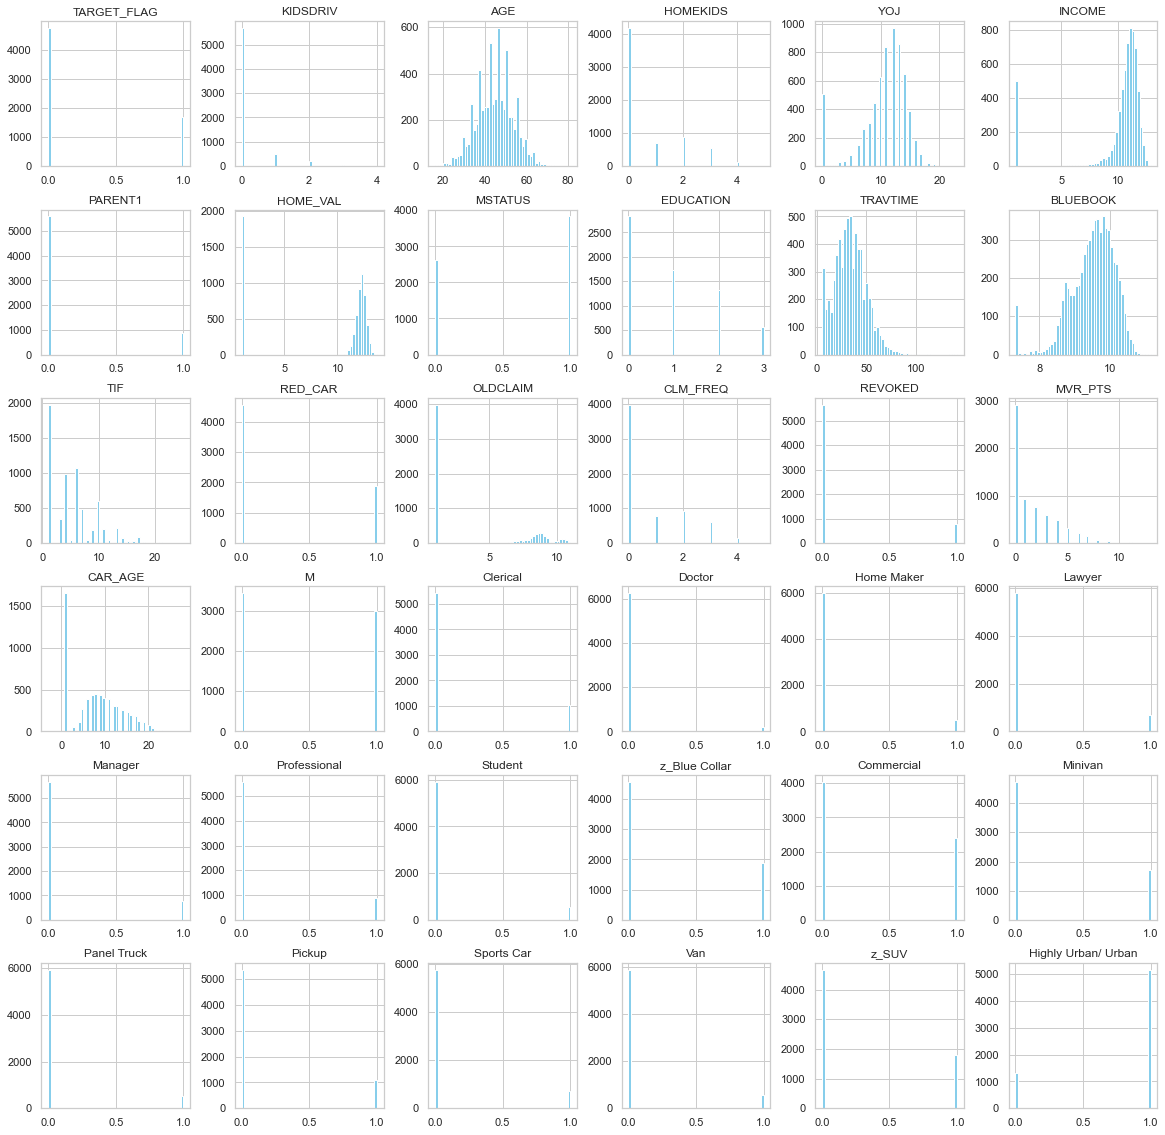

In [28]:
df_train.hist(bins=50, figsize=(20,20),color = "skyblue")
plt.show()

## Numerical Features and their impact

We notice that we have the same mean for age, YOJ, TRAVTIME, TIF when we use positive and negative TARGET_FLAG.

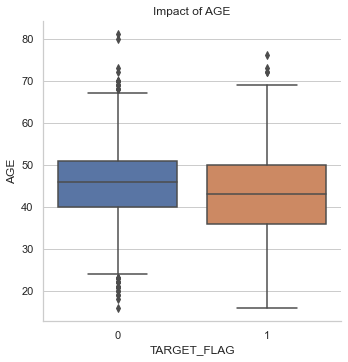

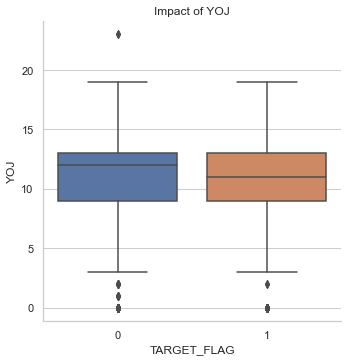

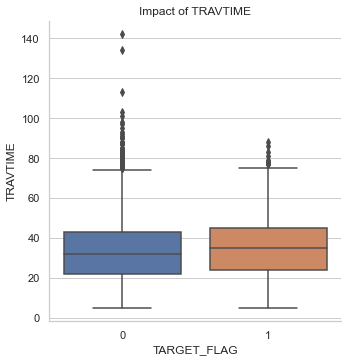

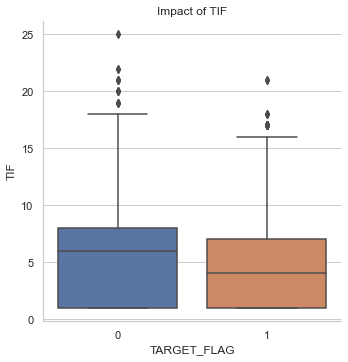

In [29]:
for column in ['AGE',
                'YOJ',
                'TRAVTIME',
                'TIF']:
    
    sns.catplot(data=df_train[['TARGET_FLAG',column]],x='TARGET_FLAG', y=column, kind="box")
    plt.title('Impact of {}'.format(column))
    plt.show()

Here we will represent boxplots visuals for INCOME, HOME_VAL, OLDCLAIM and CAR_AGE in order to see their differences.
             
            

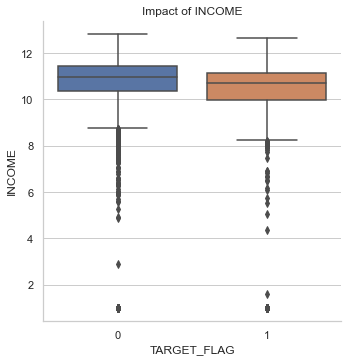

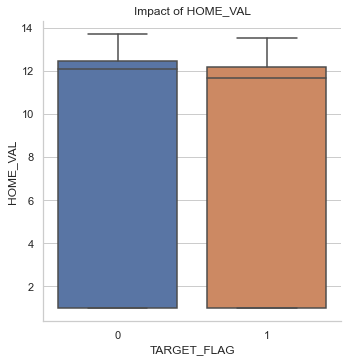

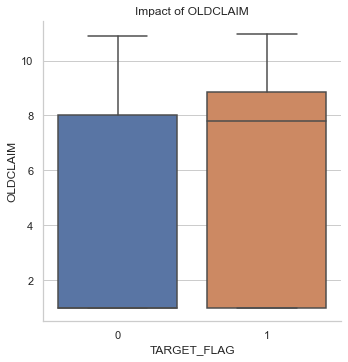

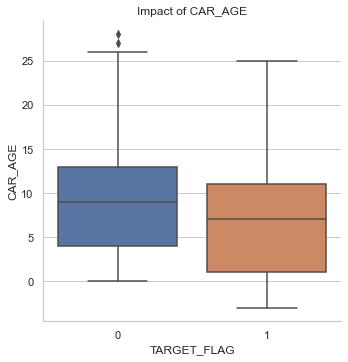

In [30]:
for column in ['INCOME',
                'HOME_VAL',
                'OLDCLAIM',
                'CAR_AGE']:
    
    sns.catplot(data=df_train[['TARGET_FLAG',column]],x='TARGET_FLAG', y=column, kind="box")
    plt.title('Impact of {}'.format(column))
    plt.show()

## Categorical Values:

Here we can notica that 'Highly Urban/ Urban' seems highly correlated to the output.

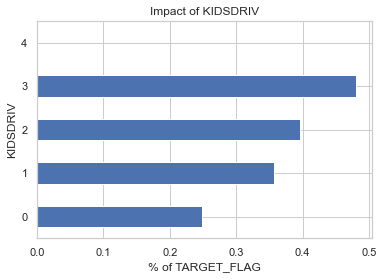

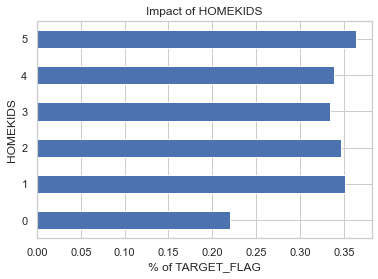

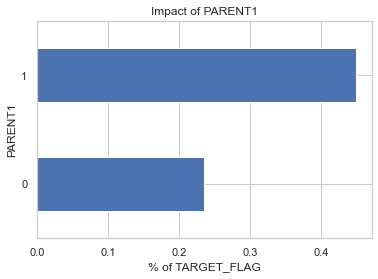

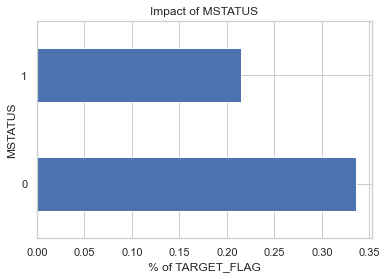

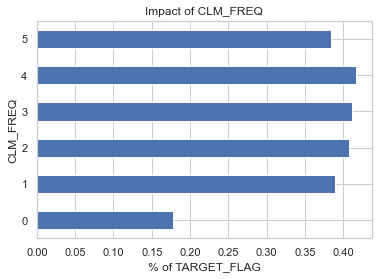

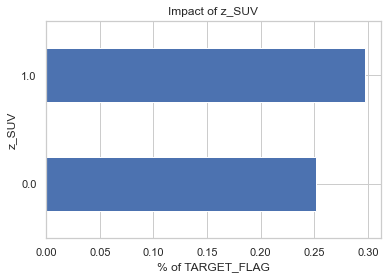

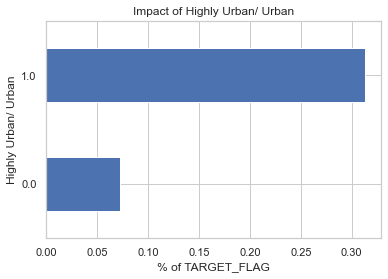

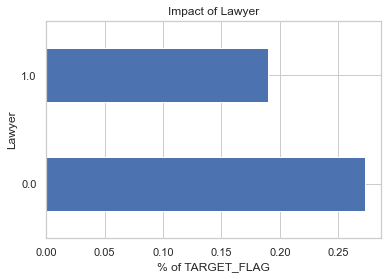

In [31]:
for column in [ 'KIDSDRIV',
            'HOMEKIDS',
            'PARENT1',
            'MSTATUS',
            'CLM_FREQ',
            'z_SUV',
            'Highly Urban/ Urban',
            'Lawyer']:

    df_train.groupby(column).mean()['TARGET_FLAG'].plot.barh()
    plt.xlabel('% of TARGET_FLAG')
    plt.title('Impact of {}'.format(column))
    plt.show()

This plot will help us to see the correlation between all the features.

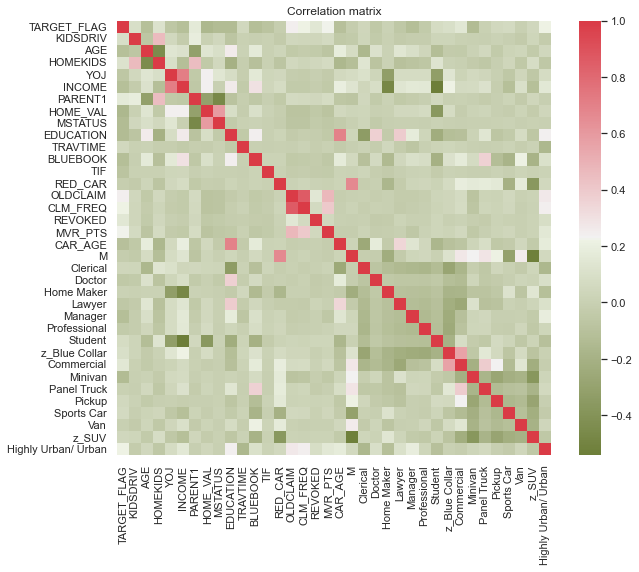

In [32]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(100, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('Correlation matrix')
plt.show()

Here we will keep only the correlation between the target value and the other features.

In [33]:
corr.sort_values(by='TARGET_FLAG', ascending=False)['TARGET_FLAG']

TARGET_FLAG            1.000000
OLDCLAIM               0.245106
MVR_PTS                0.225479
CLM_FREQ               0.222084
Highly Urban/ Urban    0.219242
PARENT1                0.164052
REVOKED                0.146289
Commercial             0.144823
HOMEKIDS               0.114991
KIDSDRIV               0.092513
z_Blue Collar          0.091916
Student                0.074061
Sports Car             0.062702
TRAVTIME               0.053116
Pickup                 0.051765
z_SUV                  0.046597
Clerical               0.038105
Home Maker             0.006902
Panel Truck            0.004553
Van                   -0.000485
RED_CAR               -0.015523
M                     -0.021397
Professional          -0.040454
Doctor                -0.052398
Lawyer                -0.057591
YOJ                   -0.065745
TIF                   -0.078964
CAR_AGE               -0.106247
INCOME                -0.111852
AGE                   -0.112937
Manager               -0.115218
BLUEBOOK

Now we will get rid of the features with a small correlation with target value.

In [34]:
corr_values      = np.abs(corr['TARGET_FLAG'])
low_corr_bool    = corr_values < 0.08
low_corr_columns = corr_values[low_corr_bool].index
print(low_corr_columns)

Index(['YOJ', 'TRAVTIME', 'TIF', 'RED_CAR', 'M', 'Clerical', 'Doctor',
       'Home Maker', 'Lawyer', 'Professional', 'Student', 'Panel Truck',
       'Pickup', 'Sports Car', 'Van', 'z_SUV'],
      dtype='object')


we will use TSNE to visualize a 2D projection to get a summary of the data.

In [35]:
TARGET = 'TARGET_FLAG'
y = df_train[TARGET].values
df_train.drop(columns=TARGET, inplace=True)
df_train.reset_index(inplace=True)
X = df_train
X = X.drop(columns=low_corr_columns)
X = X.drop(columns=['index'])
X.head()

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,EDUCATION,BLUEBOOK,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,Manager,z_Blue Collar,Commercial,Minivan,Highly Urban/ Urban
0,0,60.0,0,11.117643,0,1.000000,0,3,9.563108,8.403128,2,0,3,18.0,0.0,0.0,0.0,1.0,1.0
1,0,43.0,0,11.423537,0,12.457811,0,0,9.611797,1.000000,0,0,0,1.0,0.0,1.0,1.0,1.0,1.0
2,0,35.0,1,9.682779,0,11.729576,1,0,8.296547,10.563336,2,0,3,10.0,0.0,0.0,0.0,0.0,1.0
3,0,34.0,1,11.738474,1,1.000000,0,1,9.765948,1.000000,0,0,0,7.0,0.0,1.0,1.0,0.0,1.0
4,0,34.0,0,11.050541,0,1.000000,0,1,9.323669,1.000000,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0


In order to enhance the projection quality, we need to preprocess the data.

In [36]:

# Preprocessing
numeric_features = ['AGE',
                    'INCOME',
                    'HOME_VAL',
                    'BLUEBOOK',
                    'OLDCLAIM',
                    'CAR_AGE']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),],
    remainder='passthrough')

X = preprocessor.fit_transform(X)
X_embedded = TSNE(n_components=2).fit_transform(X)

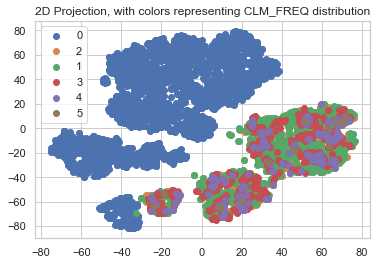

In [37]:
LABEL = 'CLM_FREQ'
values = df_train[LABEL].value_counts().index
for value in values:
    idx = df_train[(df_train[LABEL] == value)].index
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=value)
    idx = np.where(df_train[LABEL] == value)[0]
plt.legend()
plt.title('2D Projection, with colors representing {} distribution'.format(LABEL))
plt.show()